In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

In [35]:
data = pd.read_csv('/content/kyphosis.csv')

In [36]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [37]:
data.describe(include='all')

,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


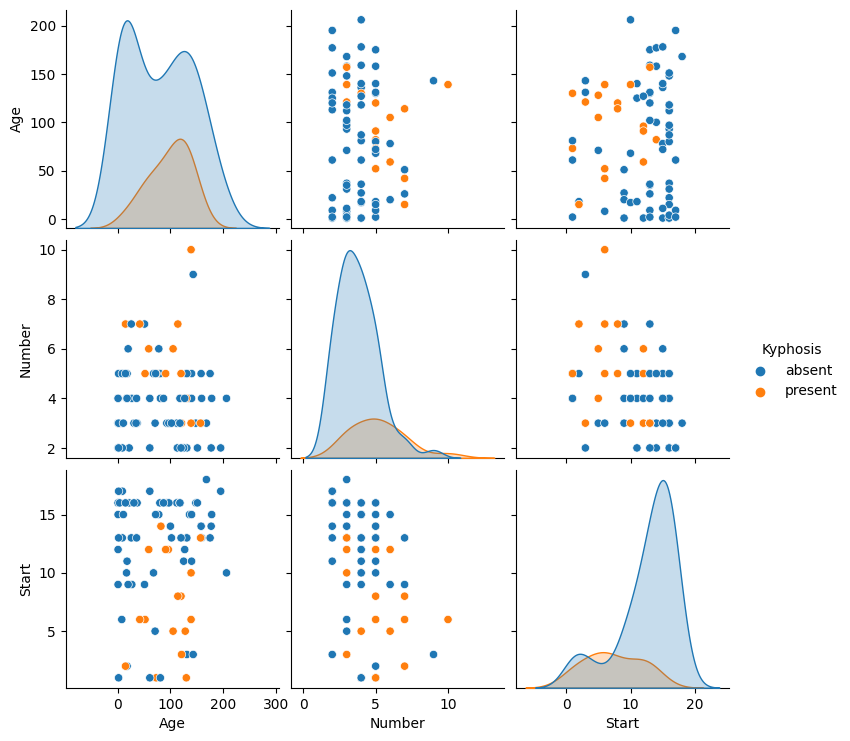

In [38]:
sns.pairplot(data, hue='Kyphosis')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
X = data.drop('Kyphosis', axis=1)
y = data['Kyphosis']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
prediction = dtree.predict(X_test)

In [49]:
prediction

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'present', 'present', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(confusion_matrix(y_test, prediction))
print()
print(classification_report(y_test, prediction))

[[18  4]
 [ 0  3]]

              precision    recall  f1-score   support

      absent       1.00      0.82      0.90        22
     present       0.43      1.00      0.60         3

    accuracy                           0.84        25
   macro avg       0.71      0.91      0.75        25
weighted avg       0.93      0.84      0.86        25



In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
rfc_pred = rfc.predict(X_test)

In [59]:
print(confusion_matrix(y_test, rfc_pred))
print()
print(classification_report(y_test, rfc_pred))

[[20  2]
 [ 1  2]]

              precision    recall  f1-score   support

      absent       0.95      0.91      0.93        22
     present       0.50      0.67      0.57         3

    accuracy                           0.88        25
   macro avg       0.73      0.79      0.75        25
weighted avg       0.90      0.88      0.89        25



In [62]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [63]:
features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

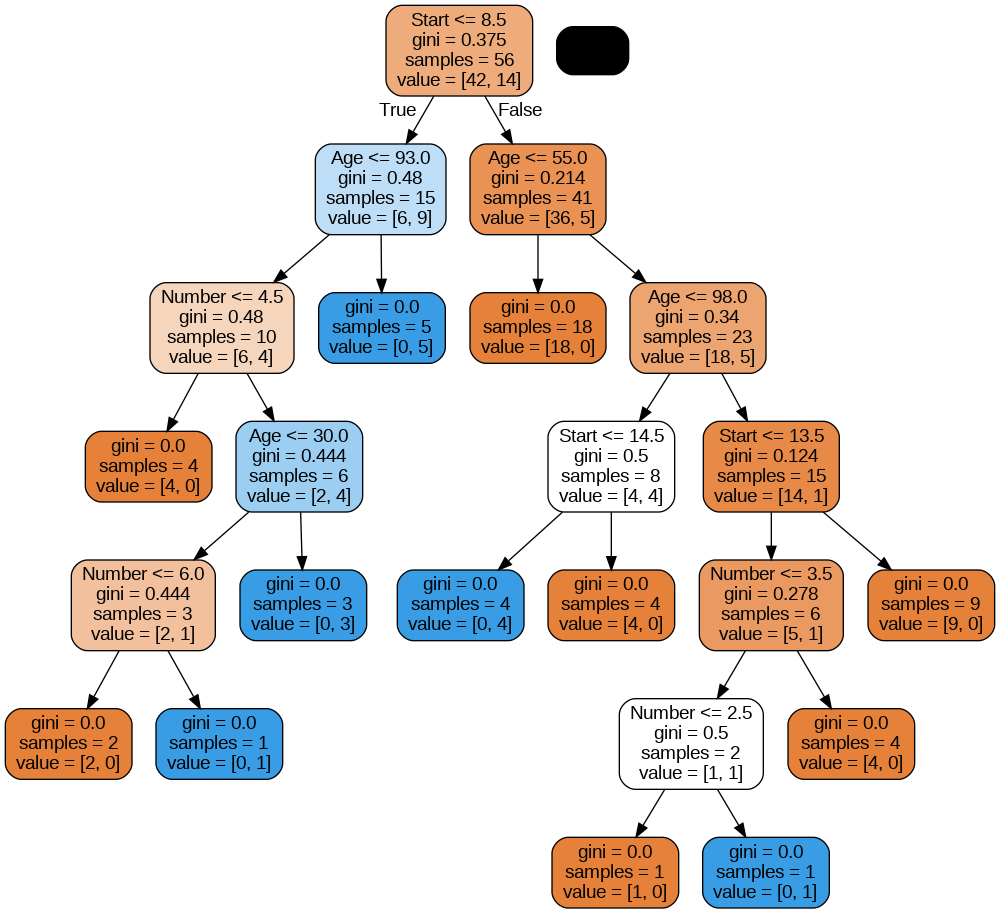

In [64]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())